# <font color='blue'>Melanoma Detection Assignment - Convolutional Network</font>

# <font color='blue'>Index</font>
- <font color='blue'>1. Initial Steps</font>
	- <font color='blue'>1.1 Imports</font>
	- <font color='blue'>1.2 Google Drive Connect</font>
	- <font color='blue'>1.3 Setting paths</font>
	- <font color='blue'>1.4 Listing File Counts</font>
	- <font color='blue'>1.5 Params Declaration</font>
	- <font color='blue'>1.6 Creating Dataset</font>
	- <font color='blue'>1.7 Listing Class Names</font>
	- <font color='blue'>1.8 Visualizing Data</font>
	- <font color='blue'>1.9 Setting cache for Dataset</font>
- <font color='blue'>2. Models</font>
	- <font color='blue'>2.1 Model 1 - Basic Model with Convolutional Layers Only</font>
		- <font color='blue'>2.1.1 Model Design, Compile & Summary</font>
		- <font color='blue'>2.1.2 Model Training</font>
		- <font color='blue'>2.1.3 Visualizing Training Results</font>
	- <font color='blue'>2.2 Augmenting Training Dataset</font>
	- <font color='blue'>2.3 Model 2 - Convolutional Layers + Augmentation</font>
		- <font color='blue'>2.3.1 Model Design, Compile & Summary</font>
		- <font color='blue'>2.3.2 Model Training</font>
		- <font color='blue'>2.3.3 Visualizing Training Results</font>
	- <font color='blue'>2.4 Model 3 - Convolutional Layers + Augmentation + Dropout</font>
		- <font color='blue'>2.4.1 Model Design, Compile & Summary</font>
		- <font color='blue'>2.4.2 Model Training</font>
		- <font color='blue'>2.4.3 Visualizing Training Results</font>
	- <font color='blue'>2.5 Model 4 - Convolutional Layers + Augmentation + Additional Dropouts</font>
		- <font color='blue'>2.5.1 Model Design, Compile & Summary</font>
		- <font color='blue'>2.5.2 Model Training</font>
		- <font color='blue'>2.5.3 Visualizing Training Results</font>
	- <font color='blue'>2.6 Model 5 - Convolutional Layers + Augmentation + Additional Dropouts + Batch Normalization</font>
		- <font color='blue'>2.6.1 Model Design, Compile & Summary</font>
		- <font color='blue'>2.6.2 Model Training</font>
		- <font color='blue'>2.6.3 Visualizing Training Results</font>
	- <font color='blue'>2.7 Class Imbalance Augmentation</font>
		- <font color='blue'>2.7.1 Class Distribution</font>
		- <font color='blue'>2.7.2 Rectification with Augmentor Samples Generation</font>
	- <font color='blue'>2.8 Model 6 - Convolutional Layers + Additional Dropouts + Batch Normalization + Augmented Dataset</font>
		- <font color='blue'>2.8.1 Reinitializing Dataset with New Augmented Data</font>
		- <font color='blue'>2.8.2 Model Design, Compile & Summary</font>
		- <font color='blue'>2.8.3 Model Training</font>
		- <font color='blue'>2.8.4 Visualizing Training Results</font>
- <font color='blue'>3. Model Prediction</font>
	- <font color='blue'>3.1 Initializing Test Dataset</font>
	- <font color='blue'>3.2 Evaluate, Record Accuracy & Loss</font>
	- <font color='blue'>3.3 Predicting Probability on 1st Image of each Class</font>

## <font color='blue'>1. Initial Steps</font>

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### <font color='blue'>1.1 Imports</font>

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import MobileNetV2


from glob import glob

import warnings
warnings.filterwarnings('ignore')

In [2]:
!python --version
print('Numpy:', np.version.version)
print('Pands:', pd.__version__)
print('Tensorflow:', tf.__version__)
!jupyter --version

Python 3.10.12
Numpy: 1.26.4
Pands: 2.1.4
Tensorflow: 2.17.0
Selected Jupyter core packages...
IPython          : 7.34.0
ipykernel        : 5.5.6
ipywidgets       : 7.7.1
jupyter_client   : 6.1.12
jupyter_core     : 5.7.2
jupyter_server   : 1.24.0
jupyterlab       : not installed
nbclient         : 0.10.0
nbconvert        : 6.5.4
nbformat         : 5.10.4
notebook         : 6.5.5
qtconsole        : not installed
traitlets        : 5.7.1


### <font color='blue'>1.2 Google Drive Connect</font>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
ls /content/gdrive/MyDrive/MelanomaDetection/CNN_

ls: cannot access '/content/gdrive/MyDrive/MelanomaDetection/CNN_': No such file or directory


### <font color='blue'>1.3 Setting paths</font>

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
# Google Drive
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/MelanomaDetection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/MelanomaDetection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

### <font color='blue'>1.4 Listing File Counts</font>

In [6]:
image_count_train = len(list(data_dir_train.glob('**/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('**/*.jpg')))
print(image_count_test)

2239
118


### <font color='blue'>1.5 Params Declaration</font>

In [7]:
batch_size = 32
img_height = 180
img_width = 180
seed = 123

### <font color='blue'>1.6 Creating Dataset</font>

In [8]:
# Using 80% of the images for training, and 20% for validation.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,  # 80% for training, 20% for validation
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


### <font color='blue'>1.7 Listing Class Names</font>

In [10]:
# List out all the classes of skin cancer and store them in a list.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### <font color='blue'>1.8 Visualizing Data</font>

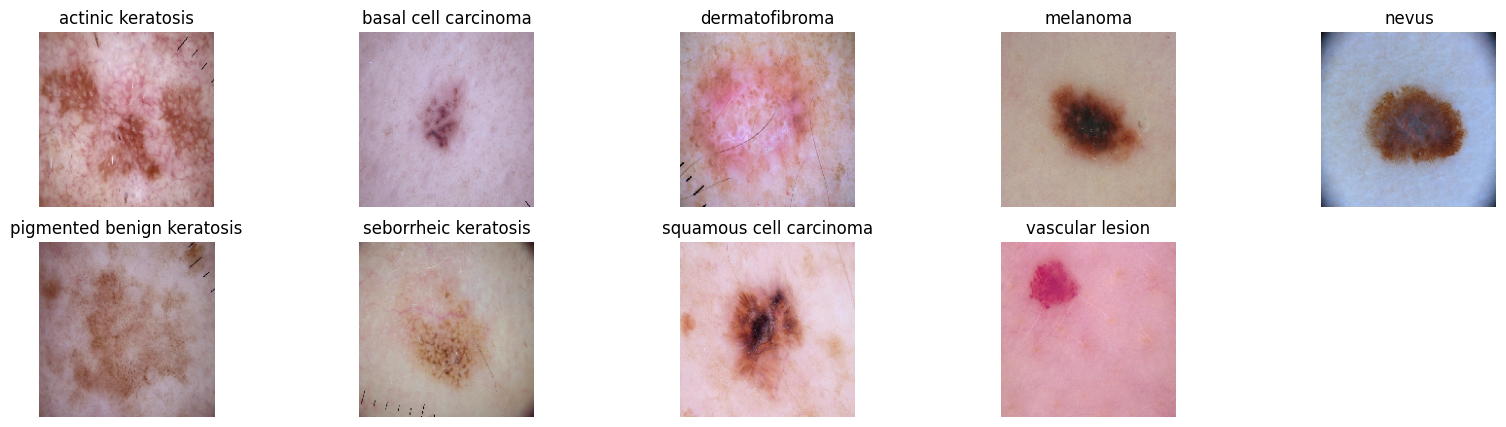

In [11]:
plt.figure(figsize=(20, 5))

# iterate over each class and display one image
for i, class_name in enumerate(class_names):
    class_path = os.path.join(data_dir_train, class_name)
    image_path = os.path.join(class_path, os.listdir(class_path)[0])  # Get the first image in each class
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))

    plt.subplot(2, 5, i + 1)  # Adjust the subplot layout based on the number of classes
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")

plt.show()

### <font color='blue'>1.9 Setting cache for Dataset</font>

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## <font color='blue'>2. Models</font>

### <font color='blue'>2.1 Model 1 - Basic Model with Convolutional Layers Only</font>

#### <font color='blue'>2.1.1 Model Design, Compile & Summary</font>

In [ ]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoding for labels
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      31,719,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,817,801 (121.38 MB)

 Trainable params: 31,817,801 (121.38 MB)

 Non-trainable params: 0 (0.00 B)

#### <font color='blue'>2.1.2 Model Training</font>

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 380s 1s/step - accuracy: 0.1956 - loss: 2.7083 - val_accuracy: 0.3020 - val_loss: 1.8902
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.3602 - loss: 1.7691 - val_accuracy: 0.4452 - val_loss: 1.6742
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5039 - loss: 1.4447 - val_accuracy: 0.5347 - val_loss: 1.3914
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5010 - loss: 1.3824 - val_accuracy: 0.5213 - val_loss: 1.4259
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5507 - loss: 1.2669 - val_accuracy: 0.4922 - val_loss: 1.4226
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5853 - loss: 1.1633 - val_accuracy: 0.5101 - val_loss: 1.3693
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6004 - loss: 1.0952 - val_accuracy: 0.5235 - val_loss: 1.5252
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6471 - loss: 1.0294 - val_accuracy: 0.5213 - v

#### <font color='blue'>2.1.3 Visualizing Training Results</font>

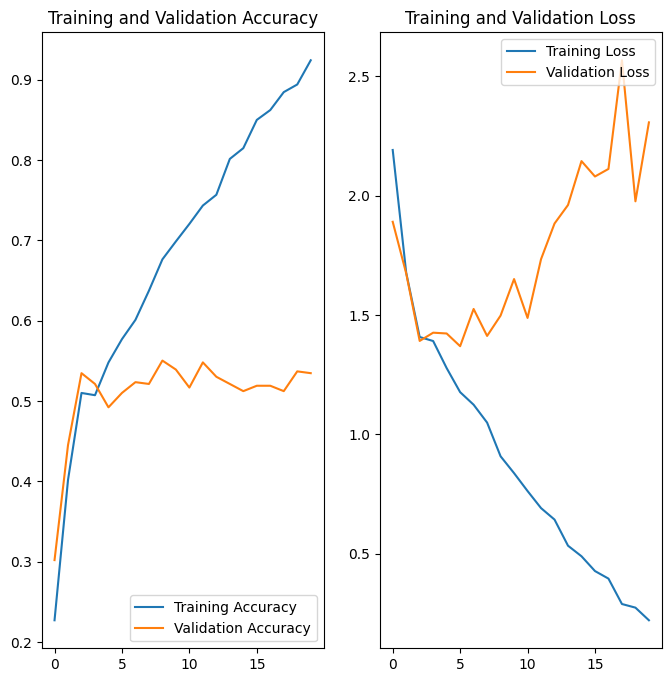

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### <font color='blue'>Findings:</font>
1. Training Accuracy: is High
2. Validation Accuracy: is OK
3. Training Loss: is decreasing, good fit
4. Validation Loss: is increasing, not a good fit

### <font color='blue'>2.2 Augmenting Training Dataset</font>

In [13]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
augmented_train_ds = keras.Sequential([
                             layers.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.RandomRotation(0.2, fill_mode='reflect'),
                             layers.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

### <font color='blue'>2.3 Model 2 - Convolutional Layers + Augmentation</font>

#### <font color='blue'>2.3.1 Model Design, Compile & Summary</font>

In [ ]:
model = models.Sequential([
    augmented_train_ds,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoding for labels
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      31,719,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,817,801 (121.38 MB)

 Trainable params: 31,817,801 (121.38 MB)

 Non-trainable params: 0 (0.00 B)

#### <font color='blue'>2.3.2 Model Training</font>

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.2167 - loss: 2.5970 - val_accuracy: 0.3758 - val_loss: 1.8192
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.3566 - loss: 1.7732 - val_accuracy: 0.4116 - val_loss: 1.5976
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.4440 - loss: 1.5523 - val_accuracy: 0.4452 - val_loss: 1.5127
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.4883 - loss: 1.4652 - val_accuracy: 0.4877 - val_loss: 1.4455
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.5137 - loss: 1.3937 - val_accuracy: 0.4810 - val_loss: 1.4098
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.5192 - loss: 1.3282 - val_accuracy: 0.4989 - val_loss: 1.4568
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.5404 - loss: 1.3064 - val_accuracy: 0.5347 - val_loss: 1.3799
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.5266 - loss: 1.2896 - val_accuracy: 0.5190 - v

#### <font color='blue'>2.3.3 Visualizing Training Results</font>

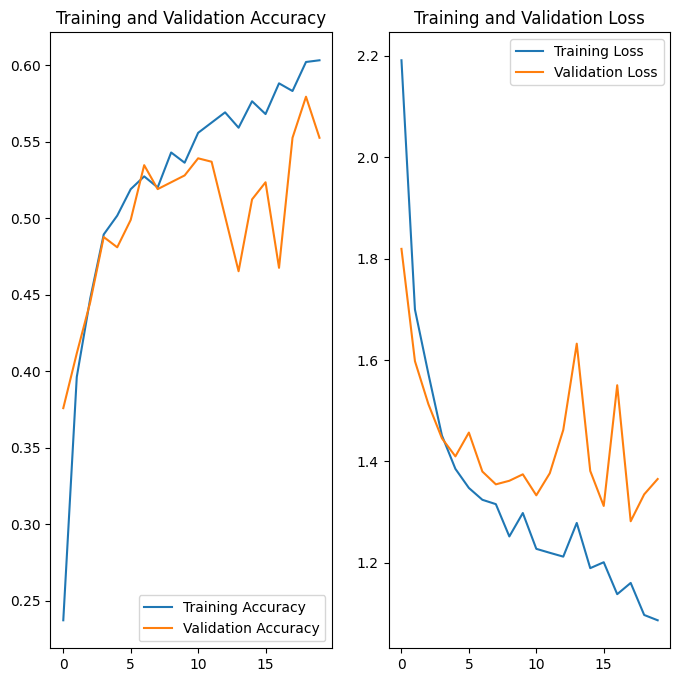

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### <font color='blue'>Findings:</font>
1. Training Accuracy: is OK
2. Validation Accuracy: is Low
3. Training Loss: is decreasing, good fit
4. Validation Loss: is increasing, not a good fit

### <font color='blue'>2.4 Model 3 - Convolutional Layers + Augmentation + Dropout</font>

#### <font color='blue'>2.4.1 Model Design, Compile & Summary</font>

In [ ]:
model = models.Sequential([
    augmented_train_ds,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Dropout(0.2),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoding for labels
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      31,719,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,817,801 (121.38 MB)

 Trainable params: 31,817,801 (121.38 MB)

 Non-trainable params: 0 (0.00 B)

#### <font color='blue'>2.4.2 Model Training</font>

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.1830 - loss: 2.9739 - val_accuracy: 0.2103 - val_loss: 2.1372
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.3007 - loss: 1.8947 - val_accuracy: 0.4631 - val_loss: 1.5909
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.4511 - loss: 1.5177 - val_accuracy: 0.5011 - val_loss: 1.5110
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.4960 - loss: 1.4568 - val_accuracy: 0.5235 - val_loss: 1.3960
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.5427 - loss: 1.3275 - val_accuracy: 0.5123 - val_loss: 1.3669
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.5402 - loss: 1.3060 - val_accuracy: 0.5302 - val_loss: 1.3495
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.5370 - loss: 1.2813 - val_accuracy: 0.5056 - val_loss: 1.4999
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.5274 - loss: 1.2915 - val_accuracy: 0.5056 - v

#### <font color='blue'>2.4.3 Visualizing Training Results</font>

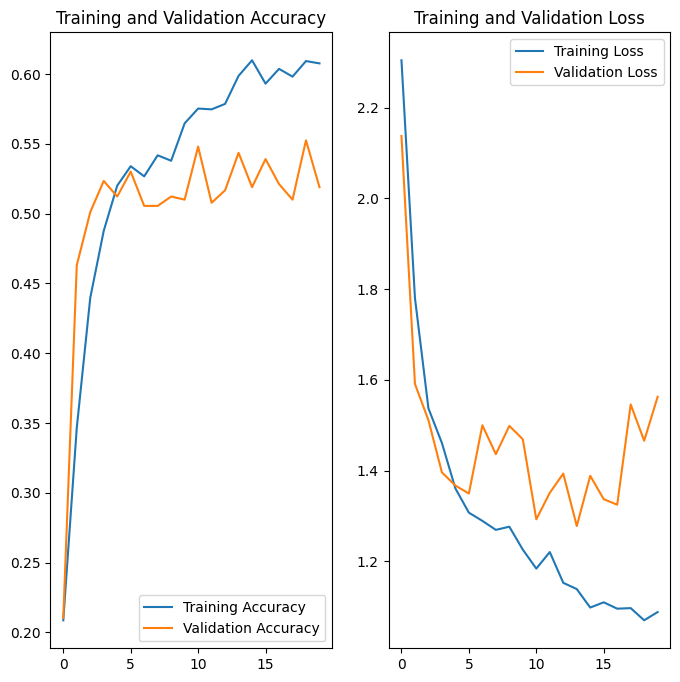

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### <font color='blue'>Findings:</font>
1. Training Accuracy: is OK
2. Validation Accuracy: is Low
3. Training Loss: is decreasing, good fit
4. Validation Loss: is decreasing, good start

### <font color='blue'>2.5 Model 4 - Convolutional Layers + Augmentation + Additional Dropouts</font>

#### <font color='blue'>2.5.1 Model Design, Compile & Summary</font>

In [ ]:
model = models.Sequential([
    augmented_train_ds,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    # layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.Dropout(0.2),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_6 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │      31,719,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,817,801 (121.38 MB)

 Trainable params: 31,817,801 (121.38 MB)

 Non-trainable params: 0 (0.00 B)

#### <font color='blue'>2.5.2 Model Training</font>

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.1802 - loss: 2.4971 - val_accuracy: 0.2910 - val_loss: 1.8080
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - accuracy: 0.3666 - loss: 1.6576 - val_accuracy: 0.4269 - val_loss: 1.5595
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - accuracy: 0.4186 - loss: 1.5217 - val_accuracy: 0.4417 - val_loss: 1.4587
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - accuracy: 0.4299 - loss: 1.4575 - val_accuracy: 0.4692 - val_loss: 1.3574
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - accuracy: 0.4729 - loss: 1.3818 - val_accuracy: 0.4759 - val_loss: 1.3241
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - accuracy: 0.4925 - loss: 1.3166 - val_accuracy: 0.4484 - val_loss: 1.3298
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - accuracy: 0.4926 - loss: 1.3098 - val_accuracy: 0.4878 - val_loss: 1.3940
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - accuracy: 0.5160 - loss: 1.2650 - 

#### <font color='blue'>2.5.3 Visualizing Training Results</font>

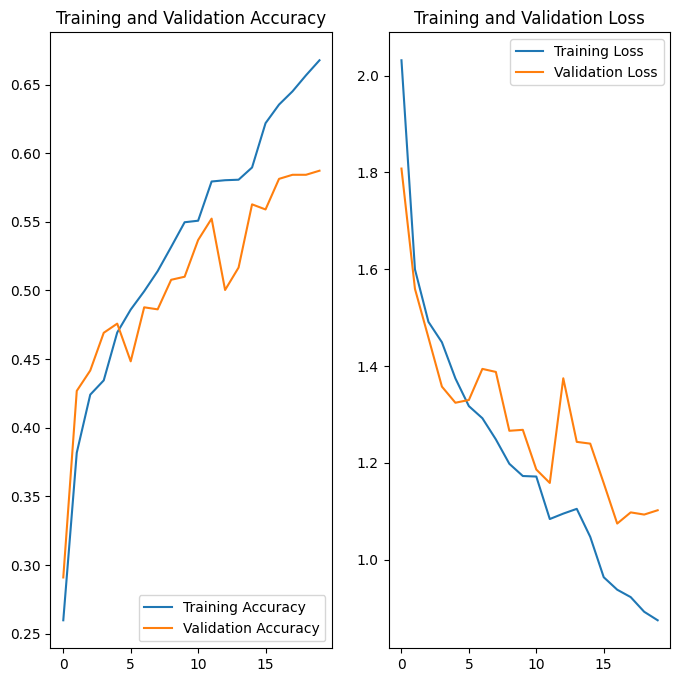

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### <font color='blue'>Findings:</font>
1. Training Accuracy: is OK
2. Validation Accuracy: is Low
3. Training Loss: is decreasing, good fit
4. Validation Loss: is decreasing, good progress

### <font color='blue'>2.6 Model 5 - Convolutional Layers + Augmentation + Additional Dropouts + Batch Normalization</font>

#### <font color='blue'>2.6.1 Model Design, Compile & Summary</font>

In [ ]:
model = models.Sequential([
    augmented_train_ds,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoding for labels
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_4 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 90, 90, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 45, 45, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 22, 22, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │      31,719,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,818,697 (121.38 MB)

 Trainable params: 31,818,249 (121.38 MB)

 Non-trainable params: 448 (1.75 KB)

#### <font color='blue'>2.6.2 Model Training</font>

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.3109 - loss: 13.9758 - val_accuracy: 0.1499 - val_loss: 17.3349
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.3637 - loss: 1.7541 - val_accuracy: 0.1499 - val_loss: 28.7491
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.3779 - loss: 1.7024 - val_accuracy: 0.1499 - val_loss: 33.4618
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.4573 - loss: 1.5671 - val_accuracy: 0.1611 - val_loss: 33.9203
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.4676 - loss: 1.5480 - val_accuracy: 0.1477 - val_loss: 30.4976
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.4966 - loss: 1.5123 - val_accuracy: 0.1477 - val_loss: 28.3447
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.4865 - loss: 1.4974 - val_accuracy: 0.1767 - val_loss: 13.8659
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.4748 - loss: 1.5303 - val_accuracy: 0.

#### <font color='blue'>2.6.3 Visualizing Training Results</font>

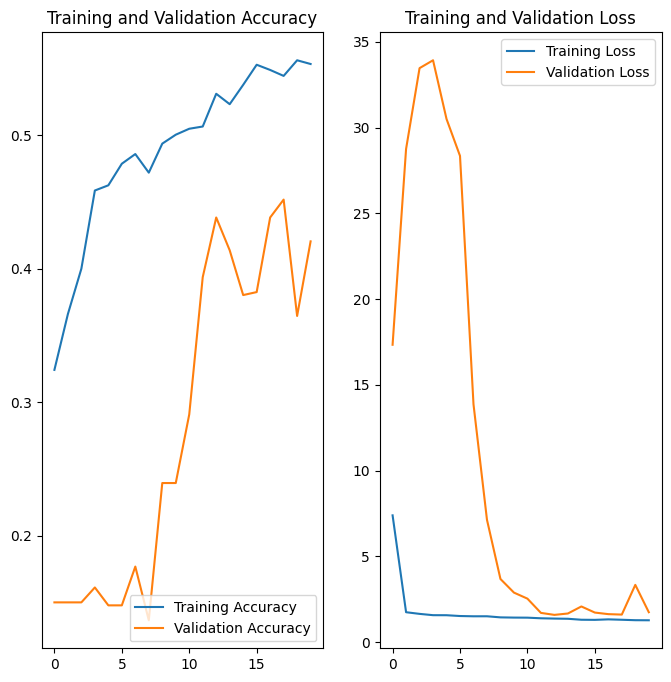

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### <font color='blue'>Findings:</font>
1. Training Accuracy: is Low
2. Validation Accuracy: is Low
3. Training Loss: is decreasing, good fit
4. Validation Loss: is decreasing

### <font color='blue'>2.7 Class Imbalance Augmentation</font>

#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

#### <font color='blue'>2.7.1 Class Distribution</font>

In [14]:
# train data in each folders
dir_train = os.listdir(data_dir_train)
dir_train.sort()
dir_test = os.listdir(data_dir_test)
dir_test.sort()

data_detail_pd = pd.DataFrame(columns=["Class","Images (Train)","Percentage (Train)","Images (Test)","Percentage (Test)"])

for dir_name in dir_train:
   total_image_in_folder = len(list(data_dir_train.glob(dir_name+"/*.jpg")))
   df = {"Class":dir_name,"Images (Train)":total_image_in_folder,"Percentage (Train)":round((total_image_in_folder/image_count_train)*100,2)}
   data_detail_pd = pd.concat([data_detail_pd, pd.DataFrame(df, index=[0])],ignore_index=True)

data_detail_pd = data_detail_pd.set_index("Class")

# test data in each folders
for dir_name in dir_test:
   total_image_in_folder = len(list(data_dir_test.glob(dir_name+"/*.jpg")))
   data_detail_pd.loc[dir_name,"Images (Test)"]  = total_image_in_folder
   data_detail_pd.loc[dir_name,"Percentage (Test)"]  = round((total_image_in_folder/image_count_test)*100,2)

display(data_detail_pd.sort_values(by="Percentage (Train)",ascending=False))

,Images (Train),Percentage (Train),Images (Test),Percentage (Test)
Class,,,,
pigmented benign keratosis,462,20.63,16,13.56
melanoma,438,19.56,16,13.56
basal cell carcinoma,376,16.79,16,13.56
nevus,357,15.94,16,13.56
squamous cell carcinoma,181,8.08,16,13.56
vascular lesion,139,6.21,3,2.54
actinic keratosis,114,5.09,16,13.56
dermatofibroma,95,4.24,16,13.56
seborrheic keratosis,77,3.44,3,2.54


### Findings:
1. Highest Training Images: pigmented benign keratosis, 462 = 20.63%
2. Lowest Training Images: seborrheic keratosis, 77 = 3.44%
3. Highest Testing Images: All have same except vascular lesion, seborrheic keratosis, 16 = 0.71%
4. Lowest Testing Images: vascular lesion, seborrheic keratosis, 3 = 0.13%

#### <font color='blue'>2.7.2 Rectification with Augmentor Samples Generation</font>

In [15]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


### Generating samples with Augmentor

In [16]:
# Defining the path for train and test images
# Google Drive
data_dir_train_aug = pathlib.Path("/content/gdrive/MyDrive/MelanomaDetection/CNN_assignment_augmented/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

In [18]:
import Augmentor

path_to_training_dataset = str(data_dir_train) + '/'
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i, output_directory=str(data_dir_train_aug)+f'/{i}', save_format='.jpg')

    # Adding various augmentations
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)  # Rotation
    p.flip_left_right(probability=0.5)  # Horizontal flip
    p.zoom_random(probability=0.5, percentage_area=0.8)  # Zooming
    p.flip_top_bottom(probability=0.5)  # Vertical flip
    p.random_contrast(probability=0.5, min_factor=0.7, max_factor=1.3)  # Contrast adjustment
    p.random_color(probability=0.5, min_factor=0.7, max_factor=1.3)  # Color adjustment
    p.random_brightness(probability=0.5, min_factor=0.7, max_factor=1.3)  # Brightness adjustment
    p.random_contrast(probability=0.5, min_factor=0.7, max_factor=1.3)  # Contrast
    p.random_erasing(probability=0.3, rectangle_area=0.2)  # Random erasing to add robustness

    p.sample(500)  # Generating 500 new samples per class


Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/MelanomaDetection/CNN_assignment_augmented/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79FFE09937C0>: 100%|██████████| 500/500 [00:29<00:00, 17.15 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/MelanomaDetection/CNN_assignment_augmented/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79FFE09AFE80>: 100%|██████████| 500/500 [00:39<00:00, 12.52 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/MelanomaDetection/CNN_assignment_augmented/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79FFE0A7CFA0>: 100%|██████████| 500/500 [00:27<00:00, 18.34 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/MelanomaDetection/CNN_assignment_augmented/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x79FFE096F010>: 100%|██████████| 500/500 [02:03<00:00,  4.04 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/MelanomaDetection/CNN_assignment_augmented/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79FFE0820A60>: 100%|██████████| 500/500 [01:45<00:00,  4.73 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/MelanomaDetection/CNN_assignment_augmented/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79FFE085F880>: 100%|██████████| 500/500 [00:31<00:00, 16.08 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/MelanomaDetection/CNN_assignment_augmented/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x79FFE09ADAB0>: 100%|██████████| 500/500 [01:01<00:00,  8.18 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/MelanomaDetection/CNN_assignment_augmented/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79FFE097B6D0>: 100%|██████████| 500/500 [00:28<00:00, 17.50 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/MelanomaDetection/CNN_assignment_augmented/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79FFE09108B0>: 100%|██████████| 500/500 [00:29<00:00, 16.74 Samples/s]


In [23]:
import os

for i in class_names:
    class_folder = str(data_dir_train_aug) + f"/{i}"
    num_images = len(os.listdir(class_folder))  # Count the number of images in the class folder
    print(f"Class {i}: {num_images} images")


Class actinic keratosis: 500 images
Class basal cell carcinoma: 500 images
Class dermatofibroma: 500 images
Class melanoma: 500 images
Class nevus: 500 images
Class pigmented benign keratosis: 500 images
Class seborrheic keratosis: 500 images
Class squamous cell carcinoma: 500 images
Class vascular lesion: 500 images


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [24]:
image_count_train = len(list(data_dir_train_aug.glob('*/*.jpg')))
print(image_count_train)

4500


### <font color='blue'>2.8 Model 6 - Convolutional Layers + Additional Dropouts + Batch Normalization + Augmented Dataset</font>

#### <font color='blue'>2.8.1 Reinitializing Dataset with New Augmented Data</font>

In [25]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train_aug,
    validation_split=0.2,  # 80% for training, 20% for validation
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


In [26]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train_aug,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


In [27]:
# AutoTune & cache for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### <font color='blue'>2.8.2 Model Design, Compile & Summary</font>

In [35]:
# # Learning Rate Scheduler Function
# def scheduler(epoch, lr):
#     if epoch < 10:
#         return lr
#     else:
#         return lr * tf.math.exp(-0.1)  # Exponential decay after 10 epochs

# Learning Rate Scheduler Function
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        # Convert the tensor to a NumPy float before returning
        return lr * float(tf.math.exp(-0.1))  # Exponential decay after 10 epochs

model = models.Sequential([
    augmented_train_ds,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layers with increased depth and L2 regularization
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),  # Increased dropout rate to 30%

    layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D((2, 2), strides=2),
    layers.BatchNormalization(),
    # layers.Dropout(0.3),

    # Global Average Pooling instead of Flatten
    layers.GlobalAveragePooling2D(),

    # Fully connected layers
    layers.Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dropout(0.3),  # Higher dropout rate for dense layer
    layers.Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Change to categorical_crossentropy if using one-hot encoding
              metrics=['accuracy'])

# Callbacks for learning rate scheduler
lr_scheduler = LearningRateScheduler(scheduler)

# Print model summary
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_4 (Rescaling)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#### <font color='blue'>2.8.3 Model Training</font>

In [36]:
epochs = 20
# history = model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs
# )
history = model.fit(
    train_ds,  # Augmented training dataset
    epochs=epochs,  # You can adjust the number of epochs as needed
    validation_data=val_ds,  # Validation dataset
    callbacks=[lr_scheduler],  # Learning rate scheduler
    verbose=2  # Print progress during training
)

Epoch 1/20
113/113 - 46s - 411ms/step - accuracy: 0.2583 - loss: 4.1696 - val_accuracy: 0.1378 - val_loss: 3.7560 - learning_rate: 0.0010
Epoch 2/20
113/113 - 36s - 321ms/step - accuracy: 0.3033 - loss: 2.7472 - val_accuracy: 0.1078 - val_loss: 3.1551 - learning_rate: 0.0010
Epoch 3/20
113/113 - 37s - 329ms/step - accuracy: 0.3403 - loss: 2.1683 - val_accuracy: 0.1067 - val_loss: 2.9252 - learning_rate: 0.0010
Epoch 4/20
113/113 - 36s - 318ms/step - accuracy: 0.3478 - loss: 1.9474 - val_accuracy: 0.1344 - val_loss: 2.7146 - learning_rate: 0.0010
Epoch 5/20
113/113 - 41s - 367ms/step - accuracy: 0.3794 - loss: 1.8349 - val_accuracy: 0.3333 - val_loss: 1.9220 - learning_rate: 0.0010
Epoch 6/20
113/113 - 37s - 329ms/step - accuracy: 0.3836 - loss: 1.7926 - val_accuracy: 0.3167 - val_loss: 1.9023 - learning_rate: 0.0010
Epoch 7/20
113/113 - 37s - 332ms/step - accuracy: 0.3856 - loss: 1.7590 - val_accuracy: 0.2322 - val_loss: 2.2353 - learning_rate: 0.0010
Epoch 8/20
113/113 - 36s - 317ms/s

#### <font color='blue'>2.8.4 Visualizing Training Results</font>

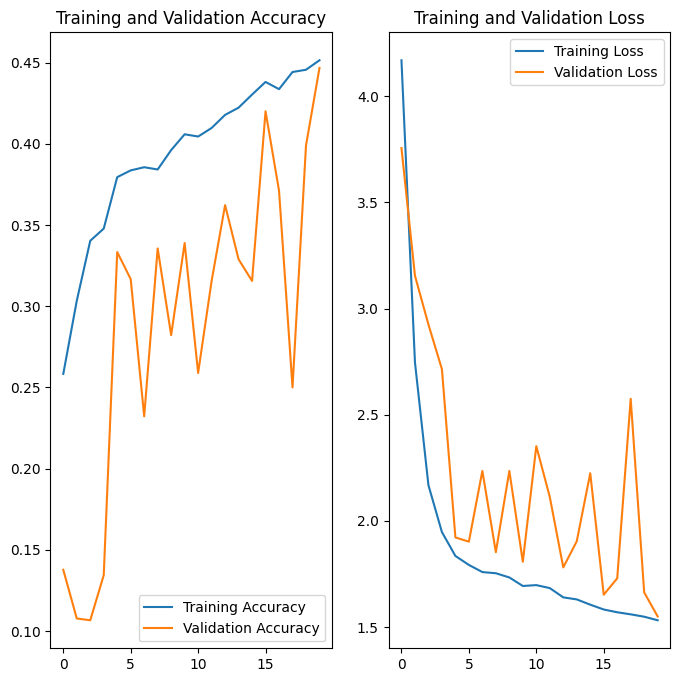

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### <font color='blue'>Findings:</font>
1. Training Accuracy: is Good
2. Validation Accuracy: is OK
3. Training Loss: is decreasing, good fit
4. Validation Loss: is decreasing but it unable to do prediction which shows overfit

### <font color='blue'>2.9 Model 7 - Base Model + Convolutional Layers + Additional Dropouts + Batch Normalization + Augmented Dataset + Learning Scheduler + Early Stopping</font>

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 6, 6, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,918,473 (11.13 MB)

 Trainable params: 660,489 (2.52 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 84s 658ms/step - accuracy: 0.2253 - loss: 7.4010 - val_accuracy: 0.3678 - val_loss: 3.7504 - learning_rate: 0.0010
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 67s 591ms/step - accuracy: 0.3580 - loss: 3.3759 - val_accuracy: 0.2956 - val_loss: 2.9053 - learning_rate: 0.0010
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 66s 582ms/step - accuracy: 0.3824 - loss: 2.5836 - val_accuracy: 0.3378 - val_loss: 2.3929 - learning_rate: 0.0010
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 67s 595ms/step - accuracy: 0.3785 - loss: 2.2470 - val_accuracy: 0.3300 - val_loss: 2.2323 - learning_rate: 0.0010
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 67s 595ms/step - accuracy: 0.3966 - loss: 2.1057 - val_accuracy: 0.3467 - val_loss: 2.1598 - learning_rate: 0.0010
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 67s 590ms/step - accuracy: 0.4079 - loss: 2.0157 - val_accuracy: 0.3389 - val_loss: 2.1002 - learning_rate: 0.0010
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 68s 605ms/step - accuracy: 0.3

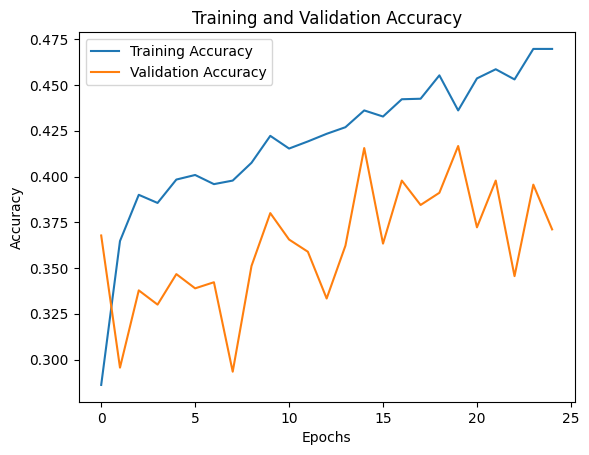

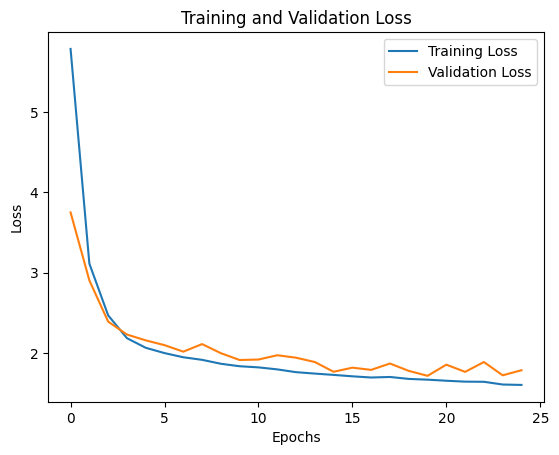

In [38]:
# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])


# Learning Rate Scheduler
def scheduler(epoch, lr):
    if epoch < 9:
        return lr
    else:
        return lr * float(tf.math.exp(-0.1))  # Exponential decay after epoch 10

lr_scheduler = LearningRateScheduler(scheduler)

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Pretrained MobileNetV2 Model
base_model = MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base layers

# Model Architecture
model = models.Sequential([
    # data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Normalize pixel values
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),  # Dropout to prevent overfitting
    layers.Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',  # Use categorical_crossentropy for one-hot encoding
              metrics=['accuracy'])
# Print the model summary
# Apply data augmentation to the training dataset using the map function
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

# Print the model summary
model.summary()

# # Prefetch for better performance
# train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
# val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

# Train the model
history = model.fit(
train_ds,
validation_data=val_ds,
epochs=50,
callbacks=[lr_scheduler, early_stopping]
)

# Visualize Training Results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


#### <font color='blue'>Findings:</font>
1. Training Accuracy: is Good
2. Validation Accuracy: is OK
3. Training Loss: is decreasing, good fit
4. Validation Loss: is decreasing

## <font color='blue'>3. Model Prediction</font>

### <font color='blue'>3.1 Initializing Test Dataset</font>

In [31]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed = seed,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 118 files belonging to 9 classes.


### <font color='blue'>3.2 Evaluate, Record Accuracy & Loss</font>

In [39]:
loss , accuracy = model.evaluate(test_ds)
print("Accuracy: ", accuracy)
print("Loss: ", loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3557 - loss: 1.9547
Accuracy:  0.3813559412956238
Loss:  1.8981289863586426


### <font color='blue'>3.3 Predicting Probability on 1st Image of each Class</font>

In [40]:
for i, class_name in enumerate(class_names):
    class_path = os.path.join(data_dir_test, class_name)
    file_name = os.listdir(class_path)[0]
    image_path = os.path.join(class_path, file_name)  # Get the first image in each class

    img = tf.keras.utils.load_img(
      image_path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print('Test/{}/{}=> Score:{}'.format(class_name,file_name,score))
    #print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(test_ds.class_names[np.argmax(score)], 100 * np.max(score)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Test/actinic keratosis/ISIC_0010889.jpg=> Score:[0.09677652 0.09682675 0.09778293 0.10838179 0.19727091 0.10532349
 0.10320213 0.09760633 0.09682918]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Test/basal cell carcinoma/ISIC_0024345.jpg=> Score:[0.10438714 0.11642891 0.11901568 0.10467986 0.10010721 0.10907203
 0.10414536 0.142813   0.09935079]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Test/dermatofibroma/ISIC_0001114.jpg=> Score:[0.10607108 0.10301977 0.12449334 0.11700468 0.10641535 0.10748491
 0.11196452 0.12423087 0.09931546]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Test/melanoma/ISIC_0000046.jpg=> Score:[0.09677301 0.09679981 0.09693601 0.1122877  0.1959476  0.1000143
 0.10727556 0.09718371 0.0967823 ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Test/nevus/ISIC_0000001.jpg=> Score:[0.09840763 0.09899683 0.10136568 0.11941613 0.16360623 0.11140539
 0.10715577 0.10095182 0.09869451]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Test/pigmented benign keratosis/ISIC_0024426.j